In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imputation3 as imp

In [68]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [69]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)

In [70]:
train

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
0               0.0  0.000273  3.0   -25.176       0.0443  7.241508e-01   
1               0.0  0.184220  7.0       NaN          NaN  6.722214e-01   
2               0.0       NaN  6.0   -15.596          NaN  6.676276e-01   
3               1.0  0.209585  NaN    -6.251       0.0277  3.796416e-03   
4               4.0       NaN  5.0       NaN       0.0260  3.048625e-06   
...             ...       ...  ...       ...          ...           ...   
17165           3.0  0.794023  5.0    -6.344       0.0328  8.991539e-02   
17166           2.0  0.820026  4.0    -1.786          NaN  2.195200e-05   
17167           1.0  0.571787  4.0    -4.679       0.0647           NaN   
17168           1.0  0.451218  9.0       NaN       0.4190  4.511802e-02   
17169           2.0  0.825294  6.0    -4.543       0.1070  2.125393e-08   

       Instrumentalness  Liveness  Valence    Tempo  ...  \
0              0.000062  0.000807   0.3400   83.398  ...   
1              0.910000  0.034966   0.7460  148.692  ...   
2              0.867000  0.001772   0.3800   84.899  ...   
3                   NaN  0.001000      NaN  150.220  ...   
4              0.000467  0.002924   0.2950   97.997  ...   
...                 ...       ...      ...      ...  ...   
17165          0.000000  0.000591   0.6580   90.002  ...   
17166          0.000000  0.000786   0.6570  174.869  ...   
17167          0.000000  0.003652   0.4190  168.388  ...   
17168               NaN  0.001260   0.5390  155.378  ...   
17169          0.911000  0.002515   0.0787  160.067  ...   

                                   Album  \
0      Sinkovsky Plays and Sings Vivaldi   
1                                    NaN   
2              Vivaldi: The Four Seasons   
3                       Life Thru A Lens   
4                             Escapology   
...                                  ...   
17165               JUST DANCE HARDSTYLE   
17166     SET FIRE TO THE RAIN HARDSTYLE   
17167          OUTSIDE HARDSTYLE SPED UP   
17168                ONLY GIRL HARDSTYLE   
17169                 MISS YOU HARDSTYLE   

                                        Uri  \
0      spotify:track:7njAZhca4o80qQdCgyEWya   
1      spotify:track:2nnXe7n3Vivs7OfQKRsfWD   
2      spotify:track:0VQMAup2VdeQWLCvM14Uz2   
3      spotify:track:1M2nd8jNUkkwrc1dgBPTJz   
4      spotify:track:2Ms33RTRCT6gArrpcrPxmo   
...                                     ...   
17165  spotify:track:0RtcKQGyI4hr8FgFH1TuYG   
17166  spotify:track:3rHvPA8lUnPBkaLyPOc0VV   
17167  spotify:track:4jk00YxPtPbhvHJE9N4ddv   
17168  spotify:track:5EyErbpsugWliX006eTDex   
17169  spotify:track:6lOn0jz1QpjcWeXo1oMm0k   

                                             Url_spotify  \
0      https://open.spotify.com/artist/2QOIawHpSlOwXD...   
1      https://open.spotify.com/artist/2QOIawHpSlOwXD...   
2      https://open.spotify.com/artist/2QOIawHpSlOwXD...   
3      https://open.spotify.com/artist/2HcwFjNelS49kF...   
4      https://open.spotify.com/artist/2HcwFjNelS49kF...   
...                                                  ...   
17165  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17166  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17167  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17168  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17169                                                NaN   

                                       Url_youtube Comments  \
0      https://www.youtube.com/watch?v=NzCL9uLkQSI   3070.0   
1      https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   
2      https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   
3      https://www.youtube.com/watch?v=luwAMFcc2f8  24350.0   
4      https://www.youtube.com/watch?v=iy4mXZN1Zzk  31150.0   
...                                            ...      ...   
17165                                          NaN      0.0   
17166                                          NaN      0.0   
171

In [71]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

def getDatasetReady(data):
    categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
    # data.loc[data['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']
    data.set_index('id', inplace= True)
    data.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)



    labels = categoricalData(data, categoryList)

    for i in categoryList:
        if i != 'Key':
            data[i] = data[i].replace(labels[i])
    return data


In [72]:
trainProcess = getDatasetReady(train)

In [73]:
trainProcess

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
id                                                                        
0               0.0  0.000273  3.0   -25.176       0.0443  7.241508e-01   
1               0.0  0.184220  7.0       NaN          NaN  6.722214e-01   
2               0.0       NaN  6.0   -15.596          NaN  6.676276e-01   
3               1.0  0.209585  NaN    -6.251       0.0277  3.796416e-03   
4               4.0       NaN  5.0       NaN       0.0260  3.048625e-06   
...             ...       ...  ...       ...          ...           ...   
17165           3.0  0.794023  5.0    -6.344       0.0328  8.991539e-02   
17166           2.0  0.820026  4.0    -1.786          NaN  2.195200e-05   
17167           1.0  0.571787  4.0    -4.679       0.0647           NaN   
17168           1.0  0.451218  9.0       NaN       0.4190  4.511802e-02   
17169           2.0  0.825294  6.0    -4.543       0.1070  2.125393e-08   

       Instrumentalness  Liveness  Valence    Tempo  Duration_ms        Views  \
id                                                                              
0              0.000062  0.000807   0.3400   83.398     117907.0          NaN   
1              0.910000  0.034966   0.7460  148.692     173427.0     184825.0   
2              0.867000  0.001772   0.3800   84.899     150667.0     184825.0   
3                   NaN  0.001000      NaN  150.220     265000.0  202457327.0   
4              0.000467  0.002924   0.2950   97.997     263867.0  316688049.0   
...                 ...       ...      ...      ...          ...          ...   
17165          0.000000  0.000591   0.6580   90.002      94667.0          NaN   
17166          0.000000  0.000786   0.6570  174.869     150857.0     164741.0   
17167          0.000000  0.003652   0.4190  168.388     136842.0      35646.0   
17168               NaN  0.001260   0.5390  155.378     108387.0       6533.0   
17169          0.911000  0.002515   0.0787  160.067     181500.0     158697.0   

           Likes       Stream  Album_type  Url_spotify  Comments  Channel  \
id                                                                          
0       137622.0   19981370.0         0.0          0.0    3070.0      0.0   
1         5190.0          NaN         NaN          0.0     122.0      1.0   
2         5190.0   19320810.0         NaN          0.0     122.0      1.0   
3       997035.0  399661898.0         0.0          1.0   24350.0      2.0   
4      1299086.0          NaN         0.0          1.0   31150.0      2.0   
...          ...          ...         ...          ...       ...      ...   
17165     1113.0          NaN         NaN       1823.0       0.0   5190.0   
17166     2019.0   10898176.0         2.0       1823.0       0.0   5190.0   
17167      329.0          NaN         2.0       1823.0       0.0      NaN   
17168        NaN    6873961.0         2.0       1823.0       0.0   5190.0   
17169     2484.0    5695584.0         2.0          NaN       0.0   5190.0   

       Composer  
id               
0           NaN  
1           1.0  
2           1.0  
3           2.0  
4           3.0  
...         ...  
17165       1.0  
17166       3.0  
17167       4.0  
17168       1.0  
17169       3.0  

[17170 rows x 19 columns]

In [74]:
trainImputCopy = trainProcess.copy()
trainY = trainImputCopy['Danceability']
trainImputCopy = trainImputCopy.drop(columns=['Danceability'], axis=1)

INIT IMPUTER

In [75]:
impute = imp.testImputate(trainImputCopy)

In [76]:
impute.loadPredictions()
trainInputed  = impute.miceTrainedModel(trainImputCopy, savePredictions=True)

___ Processing Energy ___
___ Processing Key ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Valence ___
___ Processing Tempo ___
___ Processing Duration_ms ___
___ Processing Views ___
___ Processing Likes ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Stream ___
___ Processing Album_type ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Url_spotify ___
___ Processing Comments ___
___ Processing Channel ___
___ Processing Composer ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

-- Imputation Done --


In [77]:
trainInputed

Energy  Key   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                             
0      0.000273  3.0 -25.176000     0.044300  7.241508e-01          0.000062   
1      0.184220  7.0 -13.065174     0.264156  6.722214e-01          0.910000   
2      0.416055  6.0 -15.596000     0.247164  6.676276e-01          0.867000   
3      0.209585  3.0  -6.251000     0.027700  3.796416e-03          0.155723   
4      0.437961  5.0  -9.230150     0.026000  3.048625e-06          0.000467   
...         ...  ...        ...          ...           ...               ...   
17165  0.794023  5.0  -6.344000     0.032800  8.991539e-02          0.000000   
17166  0.820026  4.0  -1.786000     0.119218  2.195200e-05          0.000000   
17167  0.571787  4.0  -4.679000     0.064700  2.420526e-01          0.000000   
17168  0.451218  9.0 -12.854186     0.419000  4.511802e-02          0.286892   
17169  0.825294  6.0  -4.543000     0.107000  2.125393e-08          0.911000   

       Liveness   Valence    Tempo  Duration_ms         Views         Likes  \
id                                                                            
0      0.000807  0.340000   83.398     117907.0  2.419411e+07  1.376220e+05   
1      0.034966  0.746000  148.692     173427.0  1.848250e+05  5.190000e+03   
2      0.001772  0.380000   84.899     150667.0  1.848250e+05  5.190000e+03   
3      0.001000  0.464492  150.220     265000.0  2.024573e+08  9.970350e+05   
4      0.002924  0.295000   97.997     263867.0  3.166880e+08  1.299086e+06   
...         ...       ...      ...          ...           ...           ...   
17165  0.000591  0.658000   90.002      94667.0  8.094088e+06  1.113000e+03   
17166  0.000786  0.657000  174.869     150857.0  1.647410e+05  2.019000e+03   
17167  0.003652  0.419000  168.388     136842.0  3.564600e+04  3.290000e+02   
17168  0.001260  0.539000  155.378     108387.0  6.533000e+03  1.840925e+05   
17169  0.002515  0.078700  160.067     181500.0  1.586970e+05  2.484000e+03   

             Stream  Album_type  Url_spotify  Comments      Channel  Composer  
id                                                                             
0      1.998137e+07         0.0     0.000000    3070.0     0.000000       9.0  
1      8.965657e+07         3.0     0.000000     122.0     1.000000       1.0  
2      1.932081e+07         3.0     0.000000     122.0     1.000000       1.0  
3      3.996619e+08         0.0     1.000000   24350.0     2.000000       2.0  
4      2.128747e+08         0.0     1.000000   31150.0     2.000000       3.0  
...             ...         ...          ...       ...          ...       ...  
17165  6.877551e+07         3.0  1823.000000       0.0  5190.000000       1.0  
17166  1.089818e+07         2.0  1823.000000       0.0  5190.000000       3.0  
17167  5.843464e+07         2.0  1823.000000       0.0  1779.552716       4.0  
17168  6.873961e+06         2.0  1823.000000       0.0  5190.000000       1.0  
17169  5.695584e+06         2.0  1572.985095       0.0  5190.000000       3.0  

[17170 rows x 18 columns]

In [78]:
def deleteSomeCols(data):
    data.drop(['Duration_ms',	'Views',	'Likes',	'Stream',	'Album_type',	'Comments',	'Channel', 'Composer'], axis=1, inplace=True)

In [79]:
deleteSomeCols(trainInputed)

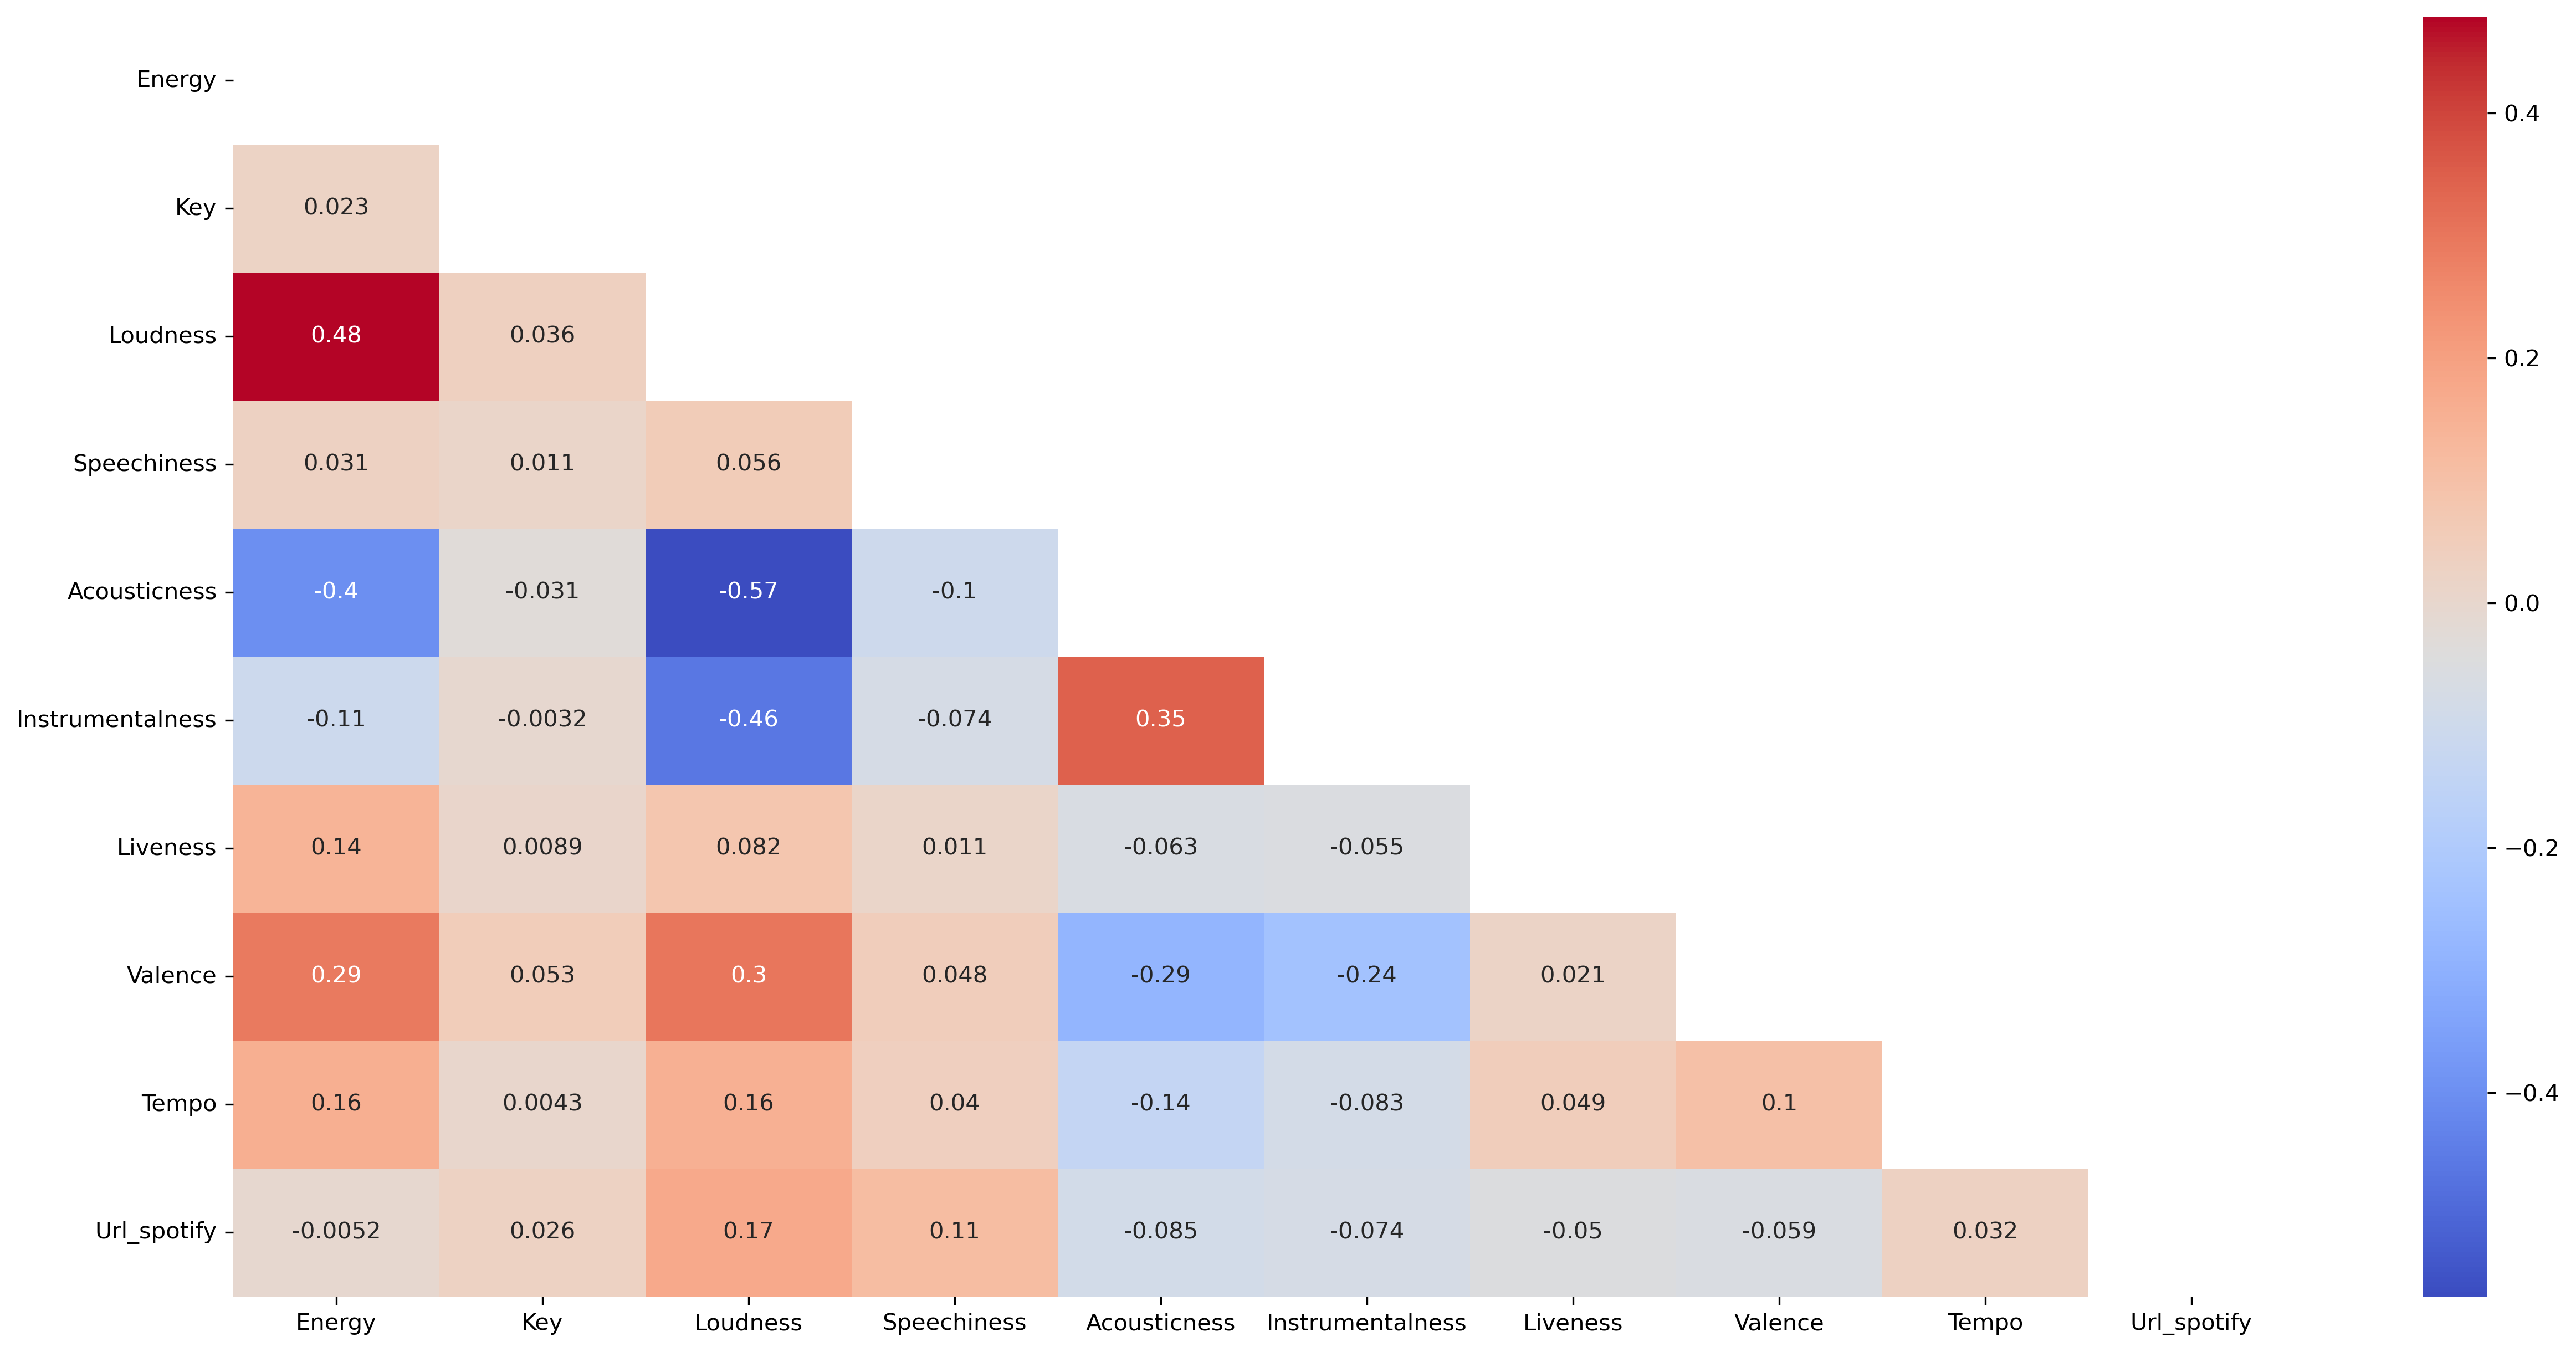

In [80]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(trainInputed.corr()))
dataplot = sns.heatmap(trainInputed.corr(), cmap="coolwarm", annot=True, mask=mask)

GET NEW DATA FOR IMPUTED DATASET

In [81]:
def processTrainingData(data):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import OneHotEncoder

    dataCopy = data.copy()
    trainedCat = dataCopy.iloc[:,dataCopy.columns.isin(['Key'])]
    standardize = dataCopy.iloc[:, dataCopy.columns.isin(['Loudness',  'Url_spotify'])]
    normaldata = dataCopy.iloc[:, ~dataCopy.columns.isin(['Key',  'Loudness',  'Url_spotify'])]


    # Scale Data
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(standardize)
    scaledDataPD = pd.DataFrame(scaledData, columns=standardize.columns)
    scaledDataPD.set_index(normaldata.index, inplace=True)  

    # OneHotEncoder
    onehotEncoder =  OneHotEncoder()
    encoded = onehotEncoder.fit_transform( trainedCat)
    onehotEncodedData = pd.DataFrame(data=encoded.toarray(), columns=onehotEncoder.get_feature_names_out())
    onehotEncodedData.set_index(normaldata.index, inplace=True)

    trainData = pd.concat((normaldata, scaledDataPD, onehotEncodedData), axis=1)

    return scaler, onehotEncoder, trainData

def processTrainingDataTest(data, scaler, onehotEncoder):

    dataCopy = data.copy()
    trainedCat = dataCopy.iloc[:,dataCopy.columns.isin(['Key'])]
    standardize = dataCopy.iloc[:, dataCopy.columns.isin(['Loudness',  'Url_spotify'])]
    normaldata = dataCopy.iloc[:, ~dataCopy.columns.isin(['Key',  'Loudness',  'Url_spotify'])]
    # Scale Data
    scaler = scaler
    scaledData = scaler.transform(standardize)
    scaledDataPD = pd.DataFrame(scaledData, columns=standardize.columns)
    scaledDataPD = scaledDataPD.set_index(normaldata.index)
    scaledDataPD.set_index(normaldata.index, inplace=True)    

    # OneHotEncoder
    onehotEncoder =  onehotEncoder
    encoded = onehotEncoder.transform( trainedCat)
    onehotEncodedData = pd.DataFrame(data=encoded.toarray(), columns=onehotEncoder.get_feature_names_out())
    onehotEncodedData.set_index(normaldata.index, inplace=True)

    testData = pd.concat((normaldata, scaledDataPD, onehotEncodedData), axis=1)

    return testData

PREPROCESSING 

In [82]:
scaler, onehotEncoder, trainDataReady = processTrainingData(trainInputed)

In [83]:
trainDataReady

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
0      0.000273     0.044300  7.241508e-01          0.000062  0.000807   
1      0.184220     0.264156  6.722214e-01          0.910000  0.034966   
2      0.416055     0.247164  6.676276e-01          0.867000  0.001772   
3      0.209585     0.027700  3.796416e-03          0.155723  0.001000   
4      0.437961     0.026000  3.048625e-06          0.000467  0.002924   
...         ...          ...           ...               ...       ...   
17165  0.794023     0.032800  8.991539e-02          0.000000  0.000591   
17166  0.820026     0.119218  2.195200e-05          0.000000  0.000786   
17167  0.571787     0.064700  2.420526e-01          0.000000  0.003652   
17168  0.451218     0.419000  4.511802e-02          0.286892  0.001260   
17169  0.825294     0.107000  2.125393e-08          0.911000  0.002515   

        Valence    Tempo  Loudness  Url_spotify  Key_0.0  ...  Key_2.0  \
id                                                        ...            
0      0.340000   83.398  0.447642     0.000000      0.0  ...      0.0   
1      0.746000  148.692  0.704882     0.000000      0.0  ...      0.0   
2      0.380000   84.899  0.651126     0.000000      0.0  ...      0.0   
3      0.464492  150.220  0.849618     0.000549      0.0  ...      0.0   
4      0.295000   97.997  0.786339     0.000549      0.0  ...      0.0   
...         ...      ...       ...          ...      ...  ...      ...   
17165  0.658000   90.002  0.847642     1.000000      0.0  ...      0.0   
17166  0.657000  174.869  0.944456     1.000000      0.0  ...      0.0   
17167  0.419000  168.388  0.883008     1.000000      0.0  ...      0.0   
17168  0.539000  155.378  0.709363     1.000000      0.0  ...      0.0   
17169  0.078700  160.067  0.885896     0.862855      0.0  ...      0.0   

       Key_3.0  Key_4.0  Key_5.0  Key_6.0  Key_7.0  Key_8.0  Key_9.0  \
id                                                                     
0          1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1          0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2          0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3          1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4          0.0      0.0      1.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...   
17165      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
17166      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
17167      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
17168      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
17169      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

       Key_10.0  Key_11.0  
id                         
0           0.0       0.0  
1           0.0       0.0  
2           0.0       0.0  
3           0.0       0.0  
4           0.0       0.0  
...         ...       ...  
17165       0.0       0.0  
17166       0.0       0.0  
17167       0.0       0.0  
17168       0.0       0.0  
17169       0.0       0.0  

[17170 rows x 21 columns]

SHUFFLE DATA

In [84]:
# from sklearn.model_selection import train_test_split
# X_train, X_Validation, y_train, y_Validation = train_test_split(trainDataReady, trainY, test_size=0.2, random_state=42)

In [85]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(trainDataReady, trainY)

GET READY TEST DATA

In [86]:
testProcess = getDatasetReady(test)

In [87]:
testInputed  = impute.miceTrainedModel(testProcess, savePredictions=True)

___ Processing Energy ___
___ Processing Key ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Duration_ms ___
___ Processing Views ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Likes ___
___ Processing Stream ___
___ Processing Album_type ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Url_spotify ___
___ Processing Comments ___
___ Processing Channel ___
___ Processing Composer ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

-- Imputation Done --


In [88]:
partialAnswer=  partialAnswer.set_index('id')

In [89]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

In [90]:
testInputedData = testInputed.copy()


In [91]:
testInputedData = testInputedData.loc[partialAnswer.index, :]

In [92]:
testInputedData

Energy   Key   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                              
18871  0.611960   8.0 -14.455375     0.113318      0.004574          0.000193   
18872  0.334797   3.0  -7.516004     0.091200      0.016777          0.001590   
18873  0.148036   6.0 -10.117000     0.280000      0.000007          0.237780   
18879  0.167284  10.0 -10.070093     0.101000      0.043987          0.000000   
18882  0.098611  10.0  -7.576000     0.040300      0.440711          0.000000   
...         ...   ...        ...          ...           ...               ...   
23462  0.307725   7.0  -2.533880     0.033415      0.299857          0.013672   
23463  0.269900   0.0 -11.299350     0.104984      0.006946          0.001588   
23473  0.480568   8.0  -3.828332     0.086666      0.153384          0.001714   
23482  0.426223   5.0  -5.807545     0.072906      0.661708          0.898308   
23484  0.014679   8.0 -13.808881     0.082686      0.076426          0.214188   

       Liveness   Valence       Tempo    Duration_ms         Views  \
id                                                                   
18871  0.000634  0.641972  121.002000  255773.000000  1.488170e+08   
18872  0.125597  0.962000  121.002000  292125.776839  1.488170e+08   
18873  0.066923  0.443096   99.439000  259888.175436  4.140185e+06   
18879  0.003049  0.391000   96.105089  302602.000000  8.687921e+07   
18882  0.000625  0.450000  125.900000   77480.000000  3.363790e+05   
...         ...       ...         ...            ...           ...   
23462  0.001309  0.770259   95.871722  123963.758812  2.393215e+06   
23463  0.001355  0.466107  103.858359  193565.214910  1.175475e+08   
23473  0.000114  0.287141   91.755727  193892.112089  7.459512e+06   
23482  0.000662  0.087281   87.969239  185842.047750 -3.451740e+06   
23484  0.001583  0.735073   98.873933  160431.173035  3.006389e+06   

              Likes        Stream  Album_type  Url_spotify      Comments  \
id                                                                         
18871  9.370610e+05  1.112196e+08         0.0  1010.156151  24156.000000   
18872  7.147798e+05  2.148720e+08         0.0   183.000000  24156.000000   
18873  1.086309e+06  4.495917e+07         0.0   183.000000   1597.000000   
18879  7.036050e+05  1.986931e+07         2.0  1024.001457  14291.000000   
18882  9.175000e+03  9.368100e+05         0.0   184.000000    379.000000   
...             ...           ...         ...          ...           ...   
23462  4.887013e+04  8.150851e+07         0.0   973.000000   6036.000000   
23463  3.806590e+05  6.228127e+07         2.0    24.000000    940.000000   
23473  8.290086e+02  3.013345e+06         0.0   634.000000    202.000000   
23482  2.305163e+04  1.849094e+07         2.0   114.000000  80261.032291   
23484  9.235481e+04  3.439282e+06         0.0   998.767406     11.000000   

       Channel  Composer  
id                        
18871    562.0       2.0  
18872    562.0       2.0  
18873    566.0       2.0  
18879    569.0       3.0  
18882    570.0       4.0  
...        ...       ...  
23462    187.0       1.0  
23463   2629.0       2.0  
23473   2633.0       1.0  
23482   2636.0       7.0  
23484    261.0       0.0  

[631 rows x 18 columns]

In [93]:
deleteSomeCols(testInputedData)

In [94]:
testInputedDataReady = processTrainingDataTest(testInputedData, scaler, onehotEncoder)

In [95]:
testInputedDataReady

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
18871  0.611960     0.113318      0.004574          0.000193  0.000634   
18872  0.334797     0.091200      0.016777          0.001590  0.125597   
18873  0.148036     0.280000      0.000007          0.237780  0.066923   
18879  0.167284     0.101000      0.043987          0.000000  0.003049   
18882  0.098611     0.040300      0.440711          0.000000  0.000625   
...         ...          ...           ...               ...       ...   
23462  0.307725     0.033415      0.299857          0.013672  0.001309   
23463  0.269900     0.104984      0.006946          0.001588  0.001355   
23473  0.480568     0.086666      0.153384          0.001714  0.000114   
23482  0.426223     0.072906      0.661708          0.898308  0.000662   
23484  0.014679     0.082686      0.076426          0.214188  0.001583   

        Valence       Tempo  Loudness  Url_spotify  Key_0.0  ...  Key_2.0  \
id                                                           ...            
18871  0.641972  121.002000  0.675353     0.554117      0.0  ...      0.0   
18872  0.962000  121.002000  0.822748     0.100384      0.0  ...      0.0   
18873  0.443096   99.439000  0.767502     0.100384      0.0  ...      0.0   
18879  0.391000   96.105089  0.768498     0.561712      0.0  ...      0.0   
18882  0.450000  125.900000  0.821474     0.100933      0.0  ...      0.0   
...         ...         ...       ...          ...      ...  ...      ...   
23462  0.770259   95.871722  0.928571     0.533736      0.0  ...      0.0   
23463  0.466107  103.858359  0.742388     0.013165      1.0  ...      0.0   
23473  0.287141   91.755727  0.901076     0.347778      0.0  ...      0.0   
23482  0.087281   87.969239  0.859037     0.062534      0.0  ...      0.0   
23484  0.735073   98.873933  0.689085     0.547870      0.0  ...      0.0   

       Key_3.0  Key_4.0  Key_5.0  Key_6.0  Key_7.0  Key_8.0  Key_9.0  \
id                                                                     
18871      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
18872      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
18873      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
18879      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
18882      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...   
23462      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
23463      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23473      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
23482      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
23484      0.0      0.0      0.0      0.0      0.0      1.0      0.0   

       Key_10.0  Key_11.0  
id                         
18871       0.0       0.0  
18872       0.0       0.0  
18873       0.0       0.0  
18879       1.0       0.0  
18882       1.0       0.0  
...         ...       ...  
23462       0.0       0.0  
23463       0.0       0.0  
23473       0.0       0.0  
23482       0.0       0.0  
23484       0.0       0.0  

[631 rows x 21 columns]

In [96]:
X_test = testInputedDataReady
y_test = partialAnswer

X_Validation = X_test
y_Validation = y_test

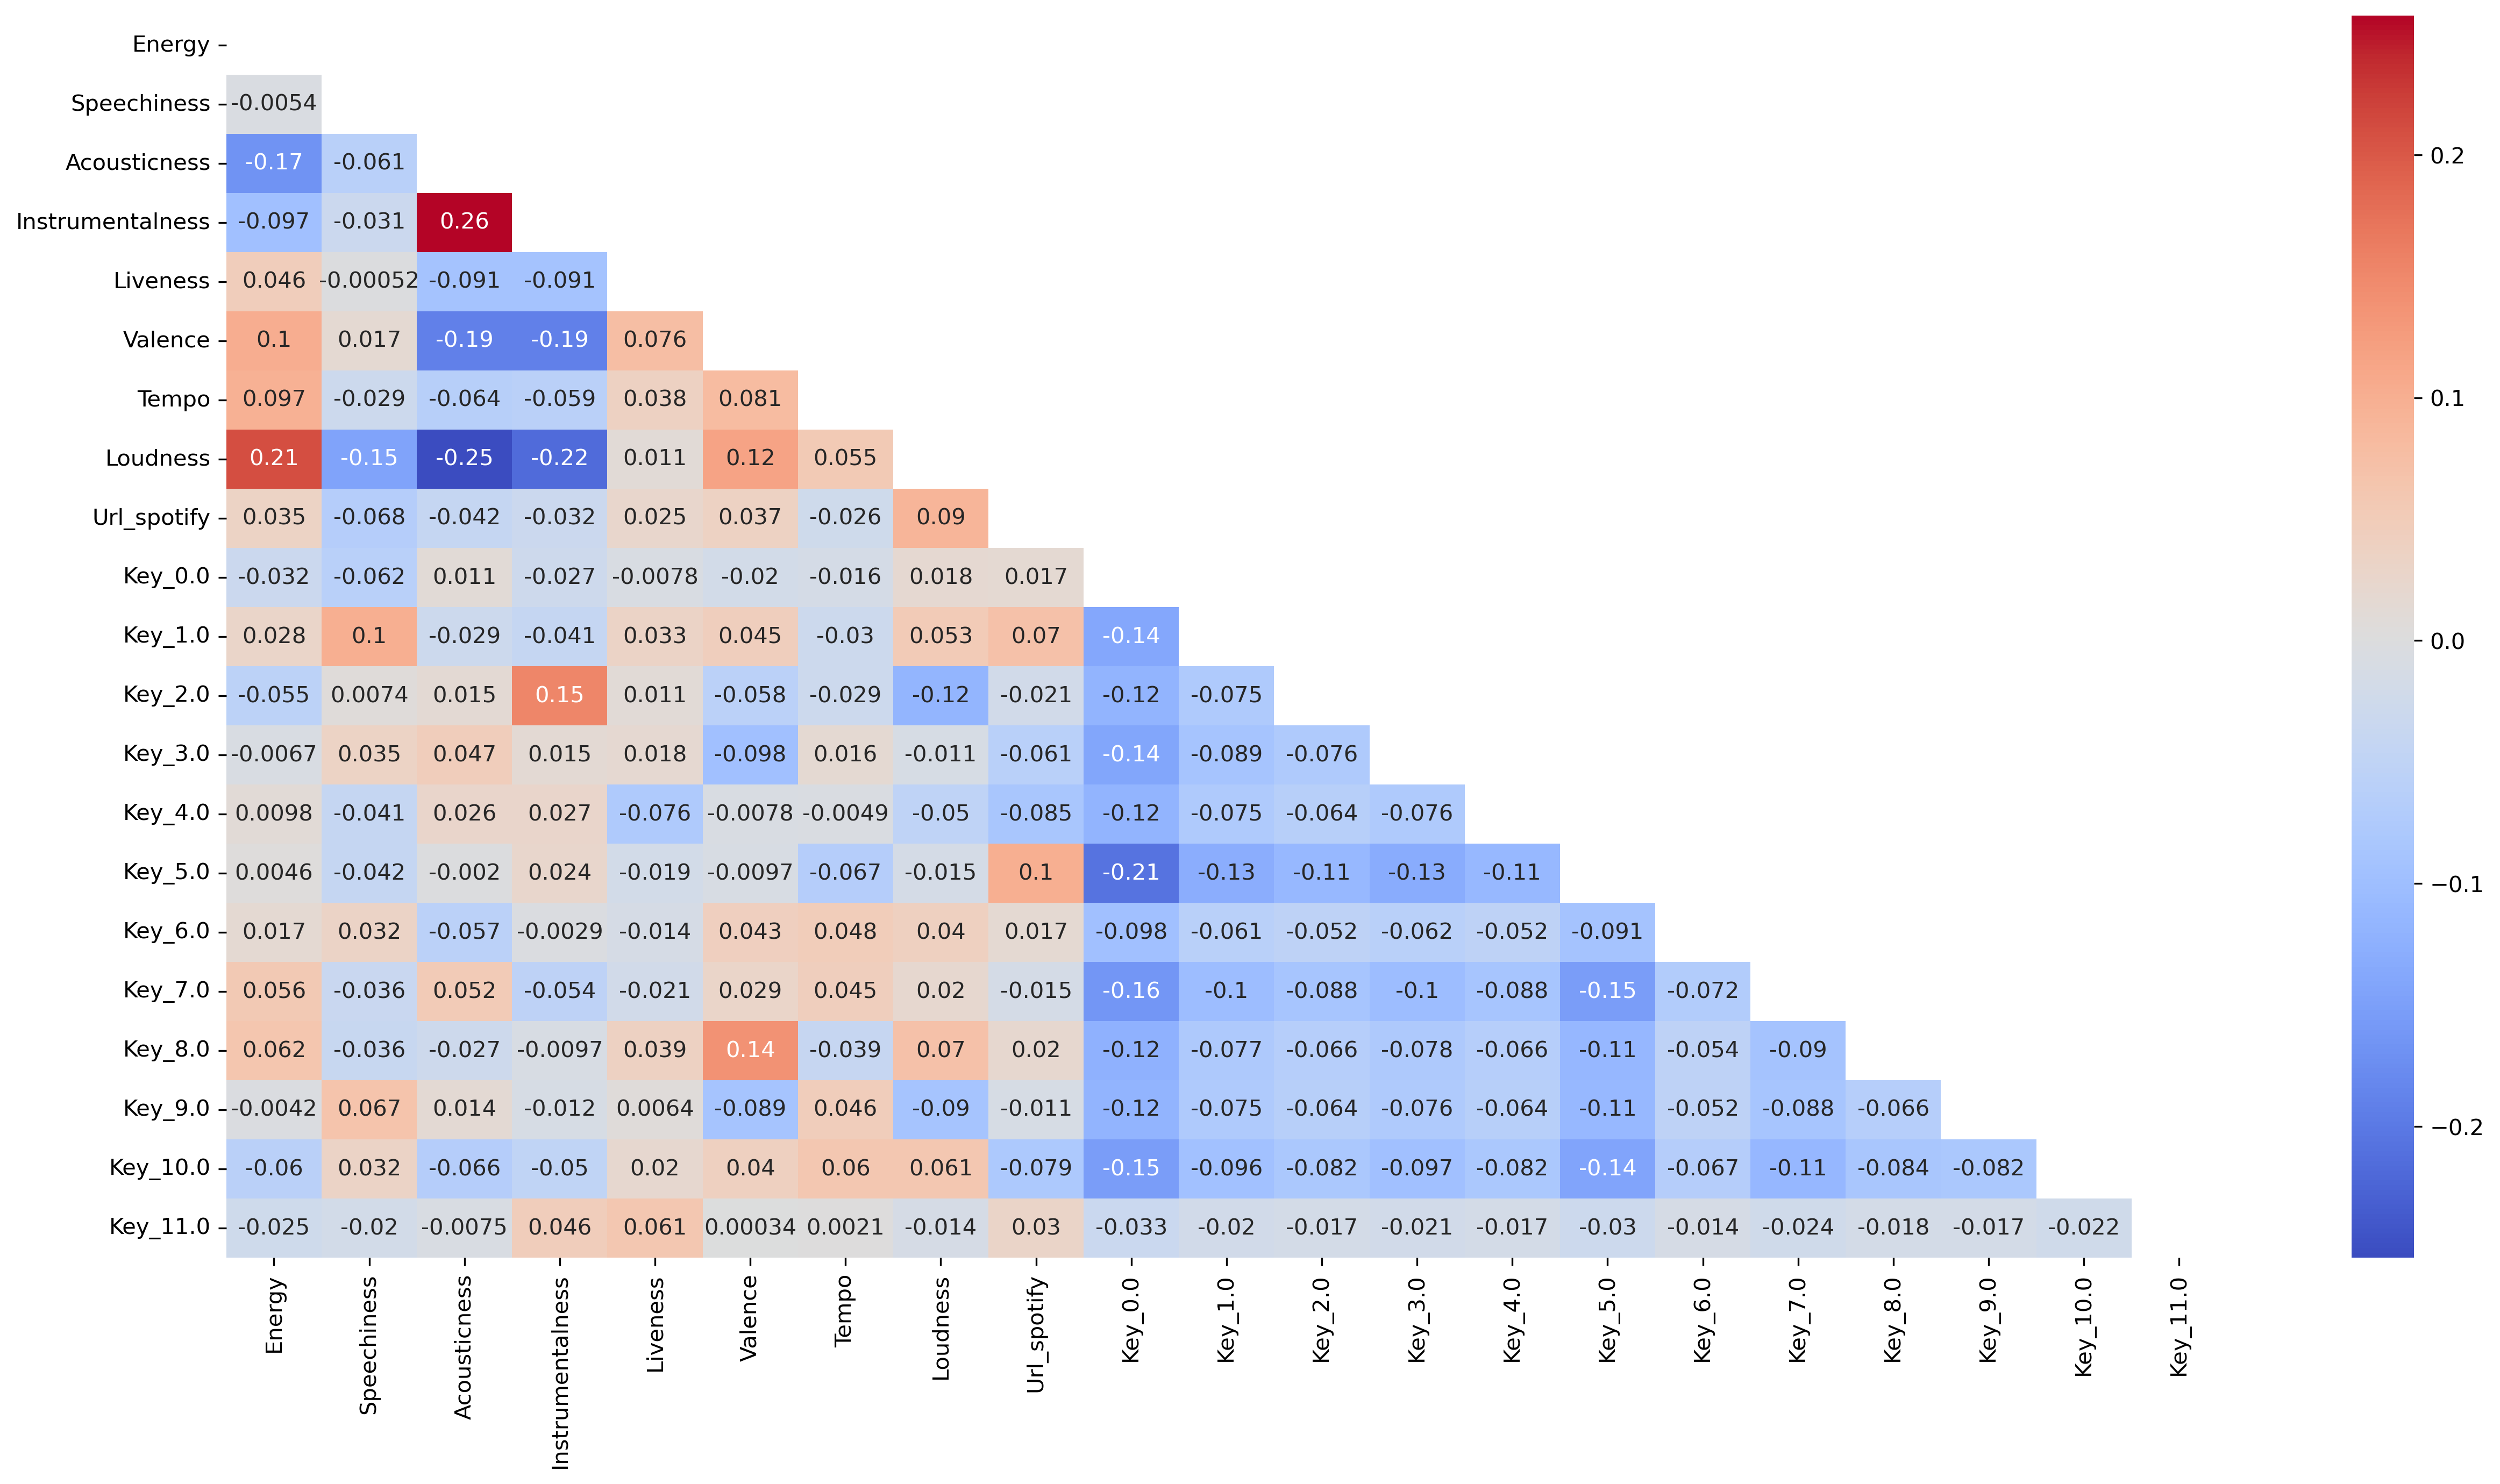

In [97]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(X_test.corr()))
dataplot = sns.heatmap(X_test.corr(), cmap="coolwarm", annot=True, mask=mask)

In [206]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def printErrors(y, y_hat):
    acc = accuracy_score(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)

    print(f'ACC: {acc * 100}, MAE:{mae}, MSE:{mse}')
    # return acc * 100, mae, mse

In [361]:
totaltest = testInputed.copy()
deleteSomeCols(totaltest)
totaltest_X = processTrainingDataTest(totaltest, scaler, onehotEncoder)

In [362]:
totaltest_X

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
17170  0.350403     0.177000  5.842771e-07          0.002330  0.230346   
17171  0.347429     0.030200  2.727257e-01          0.000687  0.000099   
17172  0.786330     0.052200  7.676563e-05          0.186428  0.001561   
17173  0.403583     0.026000  3.442951e-15          0.509000  0.000262   
17174  0.334255     0.171000  1.619428e-05          0.000000  0.000340   
...         ...          ...           ...               ...       ...   
23480  0.160377     0.045451  3.176921e-01          0.006016  0.001642   
23481  0.318585     0.073000  7.419596e-03          0.000817  0.008843   
23482  0.426223     0.072906  6.617082e-01          0.898308  0.000662   
23483  0.204440     0.037676  3.630868e-03          0.491785  0.030605   
23484  0.014679     0.082686  7.642603e-02          0.214188  0.001583   

        Valence       Tempo  Loudness  Url_spotify  Key_0.0  ...  Key_2.0  \
id                                                           ...            
17170  0.540177  138.559000  0.840527     0.000000      0.0  ...      0.0   
17171  0.852000   92.761000  0.858879     0.000000      0.0  ...      0.0   
17172  0.551000  108.014000  0.898917     0.000000      0.0  ...      0.0   
17173  0.578000  120.423000  0.858985     0.000000      0.0  ...      1.0   
17174  0.525000  167.953000  0.799150     0.583297      0.0  ...      0.0   
...         ...         ...       ...          ...      ...  ...      ...   
23480  0.160253   72.136829  0.847156     0.921009      0.0  ...      0.0   
23481  0.614366   96.437000  0.894274     0.883160      0.0  ...      0.0   
23482  0.087281   87.969239  0.859037     0.062534      0.0  ...      0.0   
23483  0.482987   99.945737  0.736768     0.390565      0.0  ...      0.0   
23484  0.735073   98.873933  0.689085     0.547870      0.0  ...      0.0   

       Key_3.0  Key_4.0  Key_5.0  Key_6.0  Key_7.0  Key_8.0  Key_9.0  \
id                                                                     
17170      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
17171      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
17172      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
17173      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
17174      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
...        ...      ...      ...      ...      ...      ...      ...   
23480      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
23481      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23482      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
23483      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
23484      0.0      0.0      0.0      0.0      0.0      1.0      0.0   

       Key_10.0  Key_11.0  
id                         
17170       0.0       0.0  
17171       0.0       0.0  
17172       0.0       0.0  
17173       0.0       0.0  
17174       0.0       0.0  
...         ...       ...  
23480       0.0       0.0  
23481       1.0       0.0  
23482       0.0       0.0  
23483       0.0       0.0  
23484       0.0       0.0  

[6315 rows x 21 columns]

In [363]:
predictTest = pd.DataFrame()
predictionResults = pd.DataFrame()

In [364]:
from sklearn.ensemble import RandomForestClassifier
randomForestClass = RandomForestClassifier(n_estimators=1000, random_state=456)
randomForestClass.fit(X_train, y_train)

predVal = randomForestClass.predict(X_Validation)
printErrors(y_Validation, predVal)

predTest = randomForestClass.predict(X_test)
printErrors(y_test, predTest)

predTestTotal = randomForestClass.predict(totaltest_X)

predictTest['rfc1'] = predTest
predictionResults['rfc1'] = predTestTotal

ACC: 16.957210776545168, MAE:3.160063391442155, MSE:16.114104595879557
ACC: 16.957210776545168, MAE:3.160063391442155, MSE:16.114104595879557


In [301]:
# from sklearn.ensemble import RandomForestClassifier
# randomForestClass = RandomForestClassifier(n_estimators=2000, random_state=276)
# randomForestClass.fit(X_train, y_train)

# predVal = randomForestClass.predict(X_Validation)
# printErrors(y_Validation, predVal)

# predTest = randomForestClass.predict(X_test)
# printErrors(y_test, predTest)

# predTestTotal = randomForestClass.predict(totaltest_X)

# predictTest['rfc2'] = predTest
# predictionResults['rfc2'] = predTestTotal

ACC: 16.164817749603806, MAE:3.1489698890649764, MSE:15.80824088748019
ACC: 16.164817749603806, MAE:3.1489698890649764, MSE:15.80824088748019


In [302]:
# from sklearn.ensemble import RandomForestRegressor

# randomForestregressor = RandomForestRegressor(n_estimators=100, random_state=123)
# randomForestregressor.fit(X_train, y_train)

# predVal = randomForestregressor.predict(X_Validation)
# predValInt = predVal.round()
# printErrors(y_Validation, predValInt)

# predTest = randomForestregressor.predict(X_test)
# predTestInt = predTest.round()
# printErrors(y_test, predTestInt)

# y_predTotal = randomForestregressor.predict(totaltest_X)


# predictTest['rfr1'] = predTest
# predictionResults['rfr1'] = y_predTotal

In [365]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
xboost_param = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "merror",
    'num_class': categories,
    'learning_rate': 1e-3,#2.3e-4,
    'max_depth': 25,
    'min_child_weight': 10,
    'lambda':1e-3,
    'alpha':1e-2,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(xboost_param, dtrain, num_boost_round=92,  evals=[(dtrain, 'train'), (dValidation, 'validation')])


print('best ', xboostModel.best_iteration+1)
dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)


printErrors(y_test, y_pred)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost'] = y_pred
predictionResults['XBoost'] = xboostPred

[0]	train-merror:0.64292	validation-merror:0.84152
[1]	train-merror:0.64024	validation-merror:0.84628
[2]	train-merror:0.63931	validation-merror:0.84311
[3]	train-merror:0.63832	validation-merror:0.84469
[4]	train-merror:0.63524	validation-merror:0.84786
[5]	train-merror:0.63442	validation-merror:0.84469
[6]	train-merror:0.63436	validation-merror:0.84469
[7]	train-merror:0.63372	validation-merror:0.84786
[8]	train-merror:0.63361	validation-merror:0.84786
[9]	train-merror:0.63296	validation-merror:0.84786
[10]	train-merror:0.63267	validation-merror:0.84628
[11]	train-merror:0.63203	validation-merror:0.84945
[12]	train-merror:0.63087	validation-merror:0.84945
[13]	train-merror:0.63162	validation-merror:0.84945
[14]	train-merror:0.63063	validation-merror:0.85103
[15]	train-merror:0.63087	validation-merror:0.85103
[16]	train-merror:0.62994	validation-merror:0.84786
[17]	train-merror:0.62976	validation-merror:0.84786
[18]	train-merror:0.62964	validation-merror:0.84628
[19]	train-merror:0.63

c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [304]:
# default_params = {
#     'objective': 'reg:squarederror',
#     'booster': 'gbtree',
#     'eval_metric': "rmse",
#     'learning_rate': 1e-3,#2.3e-4,
#     'max_depth': 25,
#     'min_child_weight': 10,
#     'lambda':1e-3,
#     'alpha':1e-2,
#     'verbosity': 0
# }

# import xgboost as xgb


# dtrain = xgb.DMatrix(data=X_train, label=y_train)
# dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
# xboostModel = xgb.train(default_params, dtrain, num_boost_round=1538, evals=[(dtrain, 'train'), (dValidation, 'validation')])

# dtest = xgb.DMatrix(X_test)
# y_pred = xboostModel.predict(dtest,  ntree_limit=xboostModel.best_iteration+1)
# yPred = y_pred.round()
# # y_pred = y_pred.argmax(axis=1)

# printErrors(y_test, yPred)

# dtestTotal = xgb.DMatrix(totaltest_X)
# xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)
# # xboostPred = xboostPred.argmax(axis=1)

# predictTest['XBoost1'] = y_pred
# predictionResults['XBoost1'] = xboostPred

In [366]:
categories = len(y_test['Danceability'].unique())
lightParams1 = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 50,
    "bagging_fraction": 0.8,
    "bagging_freq": 2,
    "verbosity":2
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
gbm = lgb.train(lightParams1,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=1000)])

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)

predictTest['lightGBM1'] = y_pred
predictionResults['lightGBM1'] = y_predTotal

[LightGBM] [Info] Number of positive: 1655, number of negative: 15515
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1664, number of negative: 15506
[LightGBM] [Info] Number of positive: 1675, number of negative: 15495
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1702, number of negative: 15468
[LightGBM] [Info] Number of positive: 1856, number of negative: 15314
[LightGBM] [Info] Number of positive: 1826, number of negative: 15344
[LightGBM] [Info] Number of positive: 1860, number of negative: 15310
[LightGBM] [Info] Number of positive: 1654, number of negative: 15516
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.039313
[LightGBM] [Debug] init for col-wise cost 0.000015 seconds, init for row-wise cost 0.000889 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `for

In [306]:
# params = {
#     'objective': 'multiclass',
#     'num_class': categories ,  # Specify the number of classes
#     'metric': 'multi_error',
#     'boosting_type': 'gbdt',
#     "max_depth": 50,
#     "num_leaves": 5,
#     "bagging_fraction": 0.6,
#     "bagging_freq": 2,
#     "learning_rate":1e-2,
#     "feature_fraction":0.5,
#     'lambda_l1':1e-3,
#     "lambda_l2":1e-2,
#     'min_data_in_leaf':10,
#     "verbosity":1
# }

# import lightgbm as lgb


# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=500,
#                 valid_sets=lgb_eval,
#                 callbacks=[lgb.early_stopping(stopping_rounds=50)])

# pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
# y_pred = pred.argmax(axis=1)
# printErrors(y_test, y_pred)

# predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
# y_predTotal = predTotal.argmax(axis=1)

# predictTest['lightGBM2'] = y_pred
# predictionResults['lightGBM2'] = y_predTotal

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2319
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 21
[LightGBM] [Info] Start training from score -2.339363
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.333939
[LightGBM] [Info] Start training from score -2.327351
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.311360
[LightGBM] [Info] Start training from score -2.224740
[LightGBM] [Info] Start training from score -2.241036
[LightGBM] [Info] Start training from score -2.222587
[LightGBM] [Info] Start training from score -2.339967
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	valid_0's multi_error: 0.85103
ACC: 14.896988906497624, MAE:3.2852

In [307]:
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'boosting_type': 'gbdt',
#     "max_depth": 100,
#     "num_leaves": 20,
#     "bagging_fraction": 0.6,
#     "bagging_freq": 10,
#     "learning_rate":2.3e-4,
#     "feature_fraction":0.5,
#     'lambda_l1':1e-2,
#     "lambda_l2":1e-3,
#     'min_data_in_leaf':60,
#     "verbosity":1
# }


# import lightgbm as lgb


# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
# print('Starting training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=10000,
#                 valid_sets=lgb_eval,
#                 callbacks=[lgb.early_stopping(stopping_rounds=5)])

# print('\n\n-------  ERROR  ------ \n')


# pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
# y_pred = pred.round()

# printErrors(y_test, y_pred)

# print('\n-------  ERROR  ------ \n')

# predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)



# predictTest['lightgbm3'] = pred
# predictionResults['lightgbm3'] = predTotal



In [367]:
from sklearn.ensemble import ExtraTreesClassifier
extraTress = ExtraTreesClassifier(n_estimators=1000, random_state=0)
extraTress.fit(X_train, y_train)
predTestTress = extraTress.predict(X_test)
printErrors(y_test, predTestTress)


y_predTotalTress = extraTress.predict(totaltest_X)


predictTest['ExtraTreesClassifier1'] = predTestTress
predictionResults['ExtraTreesClassifier1'] = y_predTotalTress

ACC: 16.48177496038035, MAE:2.9730586370839935, MSE:14.697305863708399


In [368]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import ExtraTreesClassifier
OneVsOneClassifierModel = OneVsOneClassifier(ExtraTreesClassifier(n_estimators=100, random_state=123), n_jobs=8)
OneVsOneClassifierModel.fit(X_train, y_train)
predTestOneVsOneClassifier = OneVsOneClassifierModel.predict(X_test)
printErrors(y_test, predTestOneVsOneClassifier)


y_predTotalOneVsOneClassifier = OneVsOneClassifierModel.predict(totaltest_X)


predictTest['predTestOneVsOneClassifier'] = predTestOneVsOneClassifier
predictionResults['predTotalOneVsOneClassifier'] = y_predTotalOneVsOneClassifier

ACC: 17.11568938193344, MAE:2.9223454833597464, MSE:14.193343898573692


In [369]:
from catboost import CatBoostClassifier , Pool
train_data = Pool(data=X_train,label=y_train)
eval_data = Pool(data=X_Validation,label=y_Validation)
test_data =Pool(data=X_test,label=y_test)

model = CatBoostClassifier(iterations=932, learning_rate=0.03, depth=6, l2_leaf_reg= 3)
model.fit(train_data,  verbose=True)
predictions = model.predict(test_data)

printErrors(y_test, predictions)

y_predTotal = model.predict(totaltest_X)

predictTest['CatBoostClassifier'] = predictions
predictionResults['CatBoostClassifier'] = y_predTotal

0:	learn: 2.2924169	total: 33.4ms	remaining: 31.1s
1:	learn: 2.2840310	total: 63.7ms	remaining: 29.6s
2:	learn: 2.2749954	total: 92.4ms	remaining: 28.6s
3:	learn: 2.2654135	total: 122ms	remaining: 28.3s
4:	learn: 2.2572414	total: 150ms	remaining: 27.8s
5:	learn: 2.2501555	total: 178ms	remaining: 27.5s
6:	learn: 2.2424942	total: 208ms	remaining: 27.5s
7:	learn: 2.2345943	total: 237ms	remaining: 27.4s
8:	learn: 2.2281525	total: 268ms	remaining: 27.5s
9:	learn: 2.2220281	total: 296ms	remaining: 27.3s
10:	learn: 2.2175225	total: 325ms	remaining: 27.2s
11:	learn: 2.2111932	total: 355ms	remaining: 27.2s
12:	learn: 2.2048527	total: 382ms	remaining: 27s
13:	learn: 2.1986308	total: 410ms	remaining: 26.9s
14:	learn: 2.1930513	total: 441ms	remaining: 26.9s
15:	learn: 2.1874502	total: 473ms	remaining: 27.1s
16:	learn: 2.1822247	total: 505ms	remaining: 27.2s
17:	learn: 2.1770316	total: 534ms	remaining: 27.1s
18:	learn: 2.1734215	total: 564ms	remaining: 27.1s
19:	learn: 2.1689027	total: 593ms	remain

In [352]:
# from catboost import CatBoostClassifier , Pool
# train_data = Pool(data=X_train,label=y_train)
# eval_data = Pool(data=X_Validation,label=y_Validation)
# test_data =Pool(data=X_test,label=y_test)



# model = CatBoostClassifier(loss_function='MultiClass')
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model.grid_search(grid,
#                                        X=X_train,
#                                        y=y_train,
#                                        plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2934156	test: 2.2932711	best: 2.2932711 (0)	total: 13.9ms	remaining: 13.8s
1:	learn: 2.2867266	test: 2.2865478	best: 2.2865478 (1)	total: 30.5ms	remaining: 15.2s
2:	learn: 2.2788533	test: 2.2787188	best: 2.2787188 (2)	total: 45.2ms	remaining: 15s
3:	learn: 2.2707288	test: 2.2707578	best: 2.2707578 (3)	total: 56.2ms	remaining: 14s
4:	learn: 2.2643274	test: 2.2647030	best: 2.2647030 (4)	total: 70.7ms	remaining: 14.1s
5:	learn: 2.2582962	test: 2.2585889	best: 2.2585889 (5)	total: 85ms	remaining: 14.1s
6:	learn: 2.2515165	test: 2.2520833	best: 2.2520833 (6)	total: 97.5ms	remaining: 13.8s
7:	learn: 2.2465240	test: 2.2473886	best: 2.2473886 (7)	total: 107ms	remaining: 13.3s
8:	learn: 2.2409430	test: 2.2420652	best: 2.2420652 (8)	total: 118ms	remaining: 12.9s
9:	learn: 2.2358088	test: 2.2370819	best: 2.2370819 (9)	total: 128ms	remaining: 12.7s
10:	learn: 2.2316782	test: 2.2329368	best: 2.2329368 (10)	total: 137ms	remaining: 12.3s
11:	learn: 2.2268980	test: 2.2284718	best: 2.228471

In [354]:
# grid_search_result.values()

dict_values([{'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.03}, defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199

In [370]:
copyPredictTest = predictTest.copy()
ErrorsPD = pd.DataFrame()

ErrorsPD['Mean'] = copyPredictTest.mean(axis=1)
ErrorsPD['Median'] = copyPredictTest.median(axis=1)
ErrorsPD['Max'] = copyPredictTest.max(axis=1)

prevtest = copyPredictTest.round()
ErrorsPD['Voted'] = prevtest.mode(axis=1).iloc[:, 0]

copyPredictTest = copyPredictTest.set_index(y_test.index)
ErrorsPD = ErrorsPD.set_index(y_test.index)



print("-----MEDIAN-----")
printErrors(y_test, ErrorsPD['Median'].round())
print("-----MEAN-----")
printErrors(y_test, ErrorsPD['Mean'].round())
print("-----MAX-----")
printErrors(y_test, ErrorsPD['Max'].round())

print("-----VOTED-----")
printErrors(y_test, ErrorsPD['Voted'].round())

ErrorsPD['Y']=y_test

-----MEDIAN-----
ACC: 14.580031695721077, MAE:3.033280507131537, MSE:14.748019017432647
-----MEAN-----
ACC: 12.519809825673534, MAE:2.8969889064976226, MSE:13.080824088748018
-----MAX-----
ACC: 15.530903328050712, MAE:3.2931854199683044, MSE:16.922345483359745
-----VOTED-----
ACC: 17.432646592709986, MAE:3.0697305863708397, MSE:15.513470681458003


In [371]:
copyPredictTest

rfc1  XBoost  lightGBM1  ExtraTreesClassifier1  \
id                                                      
18871   7.0     7.0          8                    6.0   
18872   7.0     7.0          8                    7.0   
18873   9.0     9.0          9                    9.0   
18879   3.0     9.0          7                    3.0   
18882   2.0     6.0          1                    6.0   
...     ...     ...        ...                    ...   
23462   7.0     6.0          8                    8.0   
23463   9.0     2.0          9                    6.0   
23473   0.0     8.0          0                    2.0   
23482   0.0     0.0          0                    0.0   
23484   9.0     8.0          9                    9.0   

       predTestOneVsOneClassifier  CatBoostClassifier  
id                                                     
18871                         6.0                 7.0  
18872                         7.0                 9.0  
18873                         9.0                 9.0  
18879                         9.0                 7.0  
18882                         4.0                 2.0  
...                           ...                 ...  
23462                         8.0                 8.0  
23463                         6.0                 6.0  
23473                         2.0                 0.0  
23482                         0.0                 0.0  
23484                         7.0                 9.0  

[631 rows x 6 columns]

In [372]:
ErrorsPD

Mean  Median  Max  Voted    Y
id                                      
18871  6.833333     7.0  8.0    7.0  9.0
18872  7.500000     7.0  9.0    7.0  9.0
18873  9.000000     9.0  9.0    9.0  8.0
18879  6.333333     7.0  9.0    3.0  8.0
18882  3.500000     3.0  6.0    2.0  8.0
...         ...     ...  ...    ...  ...
23462  7.500000     8.0  8.0    8.0  4.0
23463  6.333333     6.0  9.0    6.0  7.0
23473  2.000000     1.0  8.0    0.0  5.0
23482  0.000000     0.0  0.0    0.0  3.0
23484  8.500000     9.0  9.0    9.0  2.0

[631 rows x 5 columns]

In [374]:
copypredictionResults = predictionResults.copy()
ErrorsPDTotal = pd.DataFrame()

ErrorsPDTotal['Mean'] = copypredictionResults.mean(axis=1)
ErrorsPDTotal['Median'] = copypredictionResults.median(axis=1)
ErrorsPDTotal['Max'] = copypredictionResults.max(axis=1)
prevtest = copypredictionResults.round()
ErrorsPDTotal['Voted'] = prevtest.mode(axis=1).iloc[:, 0]
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copypredictionResults = copypredictionResults.set_index(totaltest_X.index)
ErrorsPDTotal = ErrorsPDTotal.set_index(totaltest_X.index)

In [375]:
ErrorsPDTotal

Mean  Median  Max  Voted
id                                 
17170  5.333333     5.0  9.0    2.0
17171  5.333333     4.0  8.0    4.0
17172  5.666667     6.0  6.0    6.0
17173  3.000000     3.0  4.0    2.0
17174  6.333333     8.0  9.0    8.0
...         ...     ...  ...    ...
23480  0.333333     0.0  1.0    0.0
23481  8.166667     8.0  9.0    8.0
23482  0.000000     0.0  0.0    0.0
23483  5.666667     6.0  8.0    6.0
23484  8.500000     9.0  9.0    9.0

[6315 rows x 4 columns]

In [376]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

preds = np.round(ErrorsPDTotal['Voted'])
preds = pd.DataFrame(preds, columns=['Danceability'])

In [382]:
t = pd.DataFrame(ErrorsPDTotal.index,  columns=['id'])
t['Danceability'] = np.round(ErrorsPDTotal['Median'].values)

In [383]:
t

id  Danceability
0     17170           5.0
1     17171           4.0
2     17172           6.0
3     17173           3.0
4     17174           8.0
...     ...           ...
6310  23480           0.0
6311  23481           8.0
6312  23482           0.0
6313  23483           6.0
6314  23484           9.0

[6315 rows x 2 columns]

In [384]:
t.to_csv('Median_' + datetime_string + '.csv', index=False)
